In [1]:
from DataManager import DataManager, RunManager
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
class tbjcRunManager(RunManager):
    def _fineCalibrationE(self, E, Z, trigger_ch, FinerE_cal):    

        E -= Z*0.09345+8.811369-8
        k = FinerE_cal.k.values[trigger_ch]
        b = FinerE_cal.b.values[trigger_ch]
        E = k*E+b

        E += Z*0.08395+0.8395472703062584
        E -= Z*0.09345+8.811369-7.876868999999999;
        E = E*1.0253403882555403-0.40544218689551104;
        E += Z*0.09345+0.9345;
        E  =-( E - ((Z-10)* 0.09423361+6.8701585 ))+2.796;
        E = (-E + 7.89293)*1.04804+0.35;

        return E

In [3]:
calibration_inputs = {'z_cal':      {'positions': [-6.176,-12.076,-17.976,-23.866,-29.796,-35.656], 'shift':-9.074},
                      'XNXF_cal':   'data/slope_factor.dat',
                      'E_cal':      'data/factors.dat',
                      'TAC_cal':    'data/tacshift.dat',
                      'TDC_cal':    'data/xTDCcurve.dat',
                      'RF_cal':     {'RF_shift':1648},
                      'FinerE_cal': 'data/FinerCD2.dat',
                     }

base = '../SQL/data/'

dm = DataManager([base+'{}.hdf5'.format(_) for _ in ['033','034','035']], 
                 calibration_inputs, 
                 tbjcRunManager)

Opening ../SQL/data/033.hdf5 in read-only mode
Opening ../SQL/data/034.hdf5 in read-only mode
Opening ../SQL/data/035.hdf5 in read-only mode


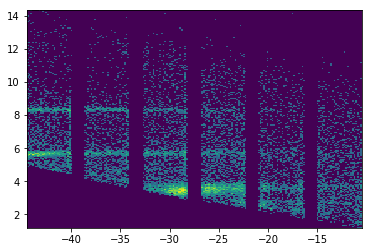

In [4]:
import matplotlib.colors as mcolors
data = dm.data
mask1 = (data.Z>-100)&(data.Z<0)&(data.TAC>1650)&(data.TAC<1900)&(data.E>1)
mask2 = ((data.RF1<800)&(data.RF1>200))|((data.RF2<800)&(data.RF2>200))
mask = mask1&mask2
plt.hist2d(data.Z[mask], data.fE[mask],bins=200,norm=mcolors.PowerNorm(0.4));

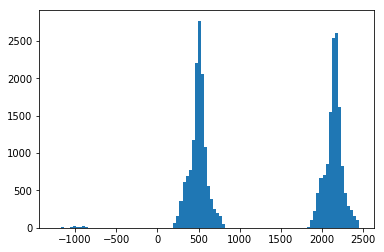

In [5]:
RF = np.concatenate([data[mask].RF1, data[mask].RF2])
plt.hist(RF[RF<1e5], bins=100);

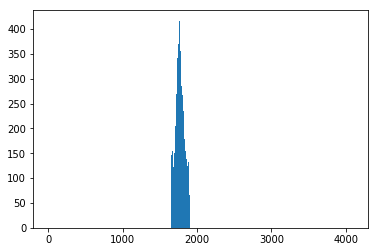

In [12]:
plt.hist(data.TAC[mask],bins=np.linspace(0,4096,1024));

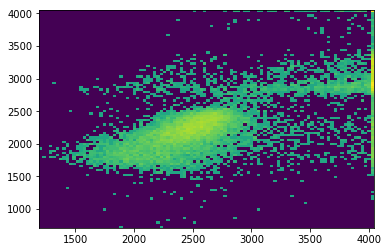

In [7]:
plt.hist2d(data.IC1[mask], data.IC2[mask], bins=100, norm=mcolors.PowerNorm(0.1));